<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/PiApproximation_fastConverge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Apprximation of $\pi$ with Fast Converging Algorithms </h1></b>

Dr. Bingsen Wang

11/28/2024
</center>

#Python Code


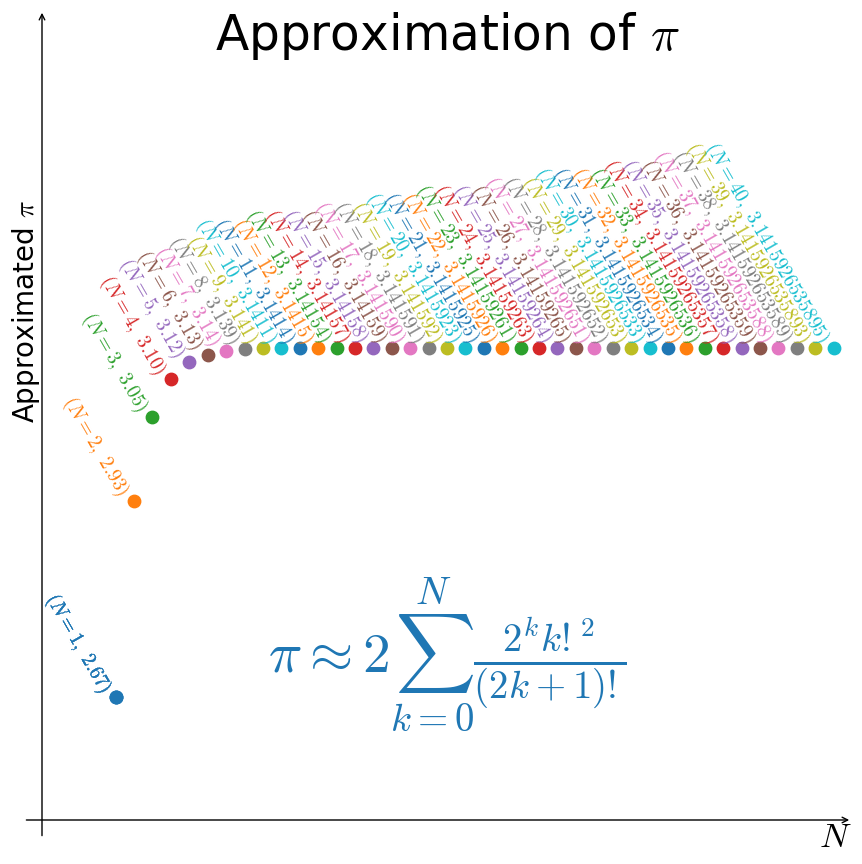

In [81]:
import numpy as np
import math
from matplotlib import animation,pyplot,cm,patches
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def fact(n):
  return math.exp(math.lgamma(n+1))
def f(k):
  return 2*(2**k)*(fact(k))**2/fact(2*k+1)

Nf = 40
fk_ser = [f(int(k)) for k in range(Nf+1) ]
fk_sum = [sum(fk_ser[:i+1]) for i in range(1,Nf+1)]
Nd=[2] #number of decimals
for k in range(1,len(fk_sum)):
  if np.round(fk_sum[k],Nd[-1])==np.round(fk_sum[k-1],Nd[-1]):
    Nd.append(Nd[-1]+1)
  else:
    Nd.append(Nd[-1])
xn,xm,yn,ym=-3,Nf+1,2.5,3.6
clst = list(cm.tab10.colors)#colors of lines
fig = pyplot.figure(figsize=([9,9]),facecolor='none')
ax = fig.add_axes((.05,0.05,.9,.9),xlim=[xn,xm],ylim=[yn,ym],fc='none')
ax.axis('off')
ax.annotate('',(xm,yn),(xn-1,yn),arrowprops=dict(arrowstyle='->',lw=1,color='k'))
ax.annotate('',(xn,ym),(xn,yn*.99),arrowprops=dict(arrowstyle='->',lw=1,color='k'))
ax.text(.5*(xm+xn),ym,'Approximation of $\pi$',size=35,va='top',ha='center')
ax.text(xn,.5*(yn+ym),'Approximated $\pi$',size=20,rotation=90,ha='right')
ax.text(xm,yn,'$N$',size=25,ha='right',va='top')
txt=ax.text(.5*(xm+xn),2.7,r'$\pi\approx 2\sum^N_{k=0}\frac{2^k k!^2}{(2k+1)!}$',size=40,ha='center')
def animate(i):
  txt.set_c(clst[i%10])
  ax.scatter(i+1,fk_sum[i],s=80,marker='o',color=clst[i%10])
  ax.text(i+1,fk_sum[i],f'$(N={i+1},\ {fk_sum[i]:.{Nd[i]}f})$',
          color=clst[i%10],ha='right',va='bottom',size=14,rotation=-60)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=200)
anim.save("piApproximation_fast.mp4", writer=animation.FFMpegWriter(fps=1.5), dpi=200)